In [81]:
import pyxtal as pyl

from pyxtal.symmetry import Group, site_symmetry
# import IPython
### lets ipynb follow the change in the module below
# %load_ext autoreload 
# %autoreload 2
# from IPython import get_ipython
# get_ipython().run_line_magic('load_ext', 'autoreload')
# get_ipython().run_line_magic('autoreload', '2')
import time





In [730]:
### reload the target module with importlib
import importlib 
import visualisation_stat as vsl
import analyse_symmetry as asy
import statistique as stat
import band_analyse as ba
importlib.reload(vsl)
importlib.reload(asy)
importlib.reload(stat)
importlib.reload(ba)


from visualisation_stat import *
from analyse_symmetry import *
from statistique import stat_R2_D2_from_json
from band_analyse import band_propretys

# below we get stat from the json file who stock dicts from the class Atoms_symmetry_group_direct_space and the  classification of R(D-1), R(D)-2

In [83]:
# path_json = '/home/jyin/workspace/gene_data/direct_space_data.json'
path_json = '/home/jyin/workspace/test_garbage/test.json'

In [84]:
stat = stat_R2_D2_from_json(path_json)

In [85]:
stat

{'no R or D': 15,
 'R-2 or D-2': 1362,
 'R-1 or D-1': 1365,
 'R-2 and D-2': 1360,
 'D-2': 2,
 'D-1 no any polar site': 1,
 'R-1 D-1 space group polar': 1261,
 'unknow case': 103,
 'error case': 0,
 'N total': 2742}

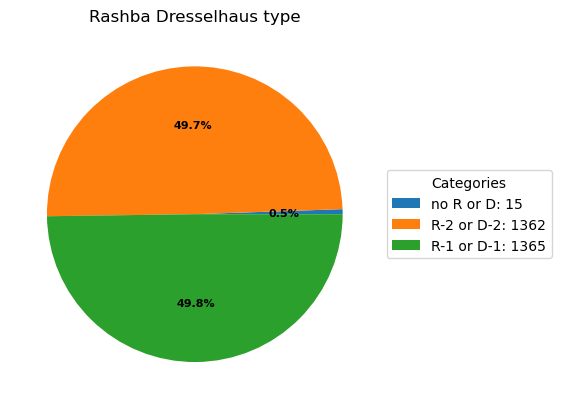

In [86]:
labels = ["no R or D", "R-2 or D-2", "R-1 or D-1"]
data = []
for lab in labels:
    data.append(stat[lab])

plot_circular(labels=labels, data=data, title_graphe= "Rashba Dresselhaus type")

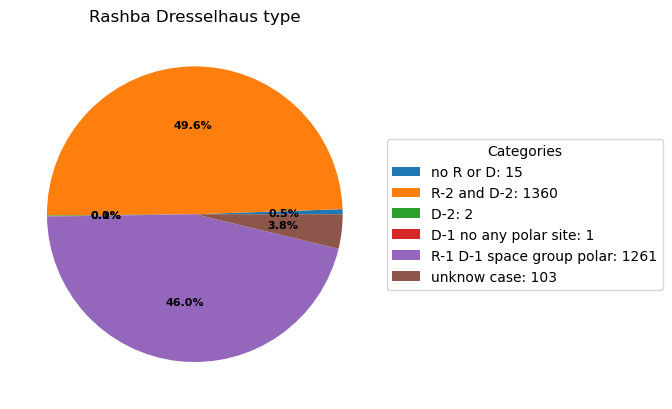

In [87]:
labels = ["no R or D", 'R-2 and D-2', 'D-2', 'D-1 no any polar site' , 'R-1 D-1 space group polar' ,'unknow case']
data = []
for lab in labels:
    data.append(stat[lab])

#### note unknow case means "D1 with at least one polar site" or "sum of dipole field != 0 but space group no polar" if the last existe.
plot_circular(labels=labels, data=data, title_graphe= "Rashba Dresselhaus type")

In [88]:
N_C1, N_Cs = stat_C1_mirror_from_json(path_json)

print(f"{N_C1} crystal point group C1")
print(f"{N_Cs} crystal point group Cs : just a mirror")

593 crystal point group C1
341 crystal point group Cs : just a mirror


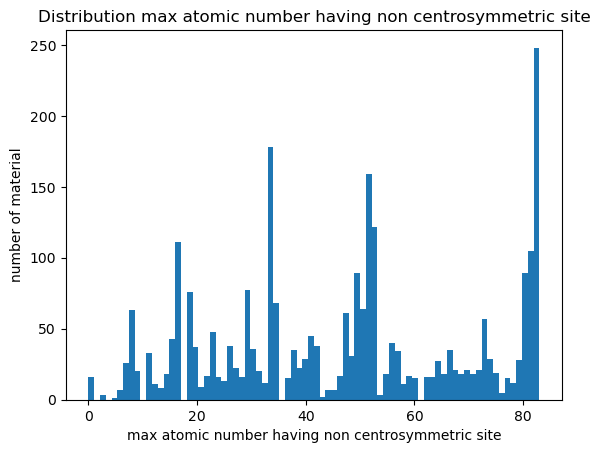

In [89]:
stat_max_Z = stat_max_Z_from_json(path_json)[0]

plot_histo(stat_max_Z, title="Distribution max atomic number having non centrosymmetric site", xlabel="max atomic number having non centrosymmetric site", ylabel="number of material")

# the same concept as section above. But we need to generate from pks of structure 2D the class Atoms_symmetry_group_direct_space and storage them to a json file.

In [457]:
df_ASGDS = generate_datafram_ASGDS_from_aiida_group(aiida_group_struc2D) 

In [459]:
path_csv = "/home/jyin/workspace/gene_data/df_ASGDS_aiida_struc2D.csv"

In [460]:
df_ASGDS.to_csv(path_csv)

In [458]:
df_ASGDS

,Material and Direct space symmetrys,Rashba or Dressehauls type
186875,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1
186986,<analyse_symmetry.Atoms_symmetry_group_direct_...,no R or D
187300,<analyse_symmetry.Atoms_symmetry_group_direct_...,D-1 polar site exist
187316,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1
187714,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1
...,...,...
205134,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1
205385,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1
205635,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-2 and D-2
205053,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1


In [461]:
path_json = "/home/jyin/workspace/gene_data/direct_space_data.json"
save_dataframe_ASGDS_json(df_ASGDS,path_json)

In [462]:
df_ex = get_dataframe_ASGDS_json(path_json)

In [463]:
df_ex

,Material and Direct space symmetrys,Rashba or Dressehauls type
186875,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1
186986,<analyse_symmetry.Atoms_symmetry_group_direct_...,no R or D
187300,<analyse_symmetry.Atoms_symmetry_group_direct_...,D-1 polar site exist
187316,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1
187714,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1
...,...,...
205134,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1
205385,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1
205635,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-2 and D-2
205053,<analyse_symmetry.Atoms_symmetry_group_direct_...,R-1 and D-1


In [464]:
df_ex.loc[187300, "Rashba or Dressehauls type"]

'D-1 polar site exist'

In [494]:
aiida_group_struc2D.count()

2759

In [404]:
stat_RD_12_from_aiida = stat_R2_D2_from_json(path=path_json)

In [ ]:
stat_RD_12_from_aiida

{'no R or D': 15,
 'R-2 or D-2': 1375,
 'R-1 or D-1': 1369,
 'R-2 and D-2': 1373,
 'D-2': 2,
 'D-1 no any polar site': 1,
 'R-1 and D-1': 1265,
 'D-1 polar site exist': 103,
 'unexpected case': 0,
 'error case': 0,
 'N total': 2759}

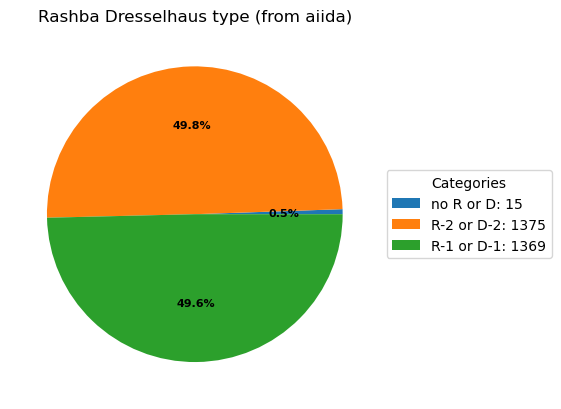

In [406]:
labels = ["no R or D", "R-2 or D-2", "R-1 or D-1"]
data = []
for lab in labels:
    data.append(stat_RD_12_from_aiida[lab])

plot_circular(labels=labels, data=data, title_graphe= "Rashba Dresselhaus type (from aiida)")

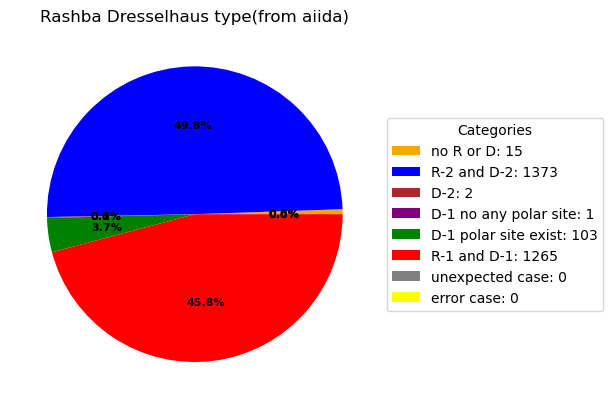

In [480]:
labels_type_SOC_colors = {"no R or D": "orange", 'R-2 and D-2':'blue', 'D-2' : 'brown', 'D-1 no any polar site' : 'purple','D-1 polar site exist' : 'green', 'R-1 and D-1' :'red' ,'unexpected case' :'grey','error case' : 'yellow'}
data = []
for lab in labels:
    data.append(stat_RD_12_from_aiida[lab])

#### note unknow case means "D1 with at least one polar site" or "sum of dipole field != 0 but space group no polar" if the last existe.
plot_circular(labels_colors=labels_type_SOC_colors, data=data, title_graphe= "Rashba Dresselhaus type(from aiida)", percentage=True)

D-1 no any polar site : just 1 case : pk = 482539

In [428]:
node_D1_nP_site = load_node(482539)

In [430]:
ase_objet = node_D1_nP_site.get_ase()
chemical_D1_nP_site = ase_objet.get_chemical_formula()

In [431]:
chemical_D1_nP_site

'BN'

D-2 pure : 2 case . pks: 484793, 325123 

In [ ]:
node_D2_1 = load_node(484793)

chemical_D2_1 = node_D2_1.get_ase().get_chemical_formula()
chemical_D2_1

'C2'

In [434]:
node_D2_1.uuid

'42744ae7-0c30-43df-8136-ab625b4f8425'

In [433]:
node_D2_2 = load_node(325123)
chemical_D2_2 = node_D2_2.get_ase().get_chemical_formula()
chemical_D2_2

'Hg3N2'

un exemple de R-2 & D-2

In [435]:
node_RD2_random = load_node(322570)
node_RD2_random.uuid

'e6e6161a-2d8b-4dab-8237-8e4eaba76bc5'

# below we have a json who storage all pks of structure 2D non metal and theire vBM cBM information.

### from them we can get the following score : 1, band gap.

In [90]:
file_path = '/home/jyin/workspace/gene_data/vBM_cBM_no_metal.json'

with open(file_path, 'r') as f:
    list_non_metal = json.load(f)

In [91]:
N_non_metal = len(list_non_metal.keys())
N_non_metal

1537

In [92]:
total_analysed_structure = aiida_group_struc2D.count()
total_analysed_structure

2759

In [93]:
N_metal = total_analysed_structure - 277 - N_non_metal

In [94]:
N_magnetic_non_metal = 0
for item in list_non_metal.values():
    magnet = item['is magnetic']
    if magnet:
        N_magnetic_non_metal += 1

In [95]:
N_magnetic_non_metal

0

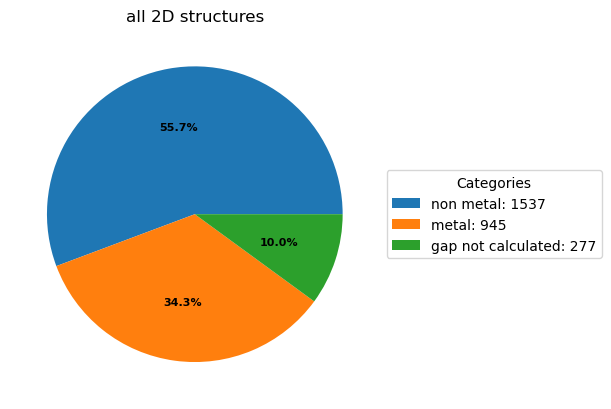

In [391]:
plot_circular([N_non_metal, N_metal , 277 ], labels=['non metal', 'metal', 'gap not calculated'], title_graphe='all 2D structures')

In [97]:
N_vBM_not_at_special_point = 0
N_cBM_not_at_special_point = 0
both_no_special = 0
for item in list_non_metal.values():
    vBM = item['vBM']
    vBM_special = vBM['special point']
    cBM = item['cBM']
    cBM_special = cBM['special point']
    if vBM_special == None and cBM_special != None:
        N_vBM_not_at_special_point += 1
    if cBM_special == None and vBM_special != None:
        N_cBM_not_at_special_point += 1
    if vBM_special == None and cBM_special == None:
        both_no_special += 1

both_special = N_non_metal - N_vBM_not_at_special_point - N_cBM_not_at_special_point - both_no_special

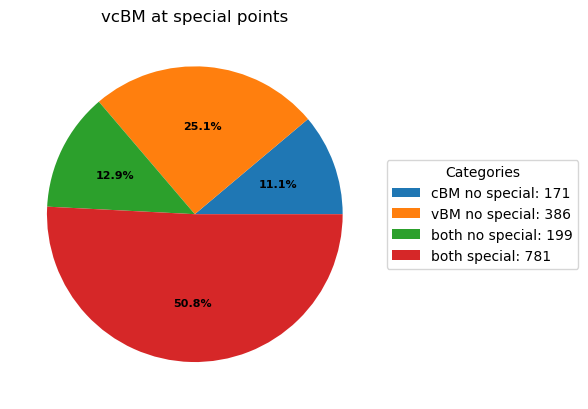

In [98]:
plot_circular([N_cBM_not_at_special_point, N_vBM_not_at_special_point,both_no_special, both_special], ['cBM no special', 'vBM no special', 'both no special', 'both special'], 'vcBM at special points')

#### scores

In [ ]:

outputs = analyse_loop_pks_struc_2D()
if len(outputs) ==  4:
    list1, list2 , pks_struc_non_metal, pks_havent_band_gaps = outputs
else :
    list1, list2 = outputs
N_struc2D = aiida_group_struc2D.count()


print(f"{N_struc2D} structure 2D analysed")
print(f"{len(pks_havent_band_gaps)} structure 2D don't have band gaps")
t2 = time.time()
delta_t = t2-t1
print(f"{delta_t} seconde to find do analyse_loop_pks_struc_2D")

In [ ]:
len(list1[1])

1537

In [ ]:
# import IPython

# IPython.get_ipython().run_line_magic('pdb', 'on')  # Turn on debugger

In [ ]:

scores_dataframe = scores_to_dataframe(list1, list2)



In [ ]:
scores_dataframe = scores_dataframe.rename(columns={"band gap": "band gap (ev)"})

In [ ]:
scores_dataframe

,band gap (ev),max Z at IA site,atomes numbers
187316,2.533683e+00,75,34
187714,3.918257e+00,21,8
187698,6.055412e-01,52,7
187288,3.967919e+00,75,11
186870,2.288782e+00,81,26
...,...,...,...
194890,1.651833e+00,56,30
194906,5.981803e+00,8,36
195129,5.216022e-01,82,14
195506,1.252716e-09,49,7


In [ ]:
from copy import deepcopy

In [ ]:
scores_dataframe_corrected = deepcopy(scores_dataframe)

In [ ]:
scores_dataframe_corrected

In [ ]:
# scores_dataframe.to_json('/home/jyin/workspace/gene_data/scores_bg_mZIA_Natom.json')

In [ ]:
df = pd.read_json('/home/jyin/workspace/gene_data/scores_bg_mZIA_Natom.json')
df

In [ ]:
# scores_dataframe_corrected['band gap (ev)'] = 1/ scores_dataframe_corrected['band gap (ev)']
scores_dataframe_corrected = scores_dataframe_corrected.rename(columns={"nomber numbers": "atom numbers"})
# scores_dataframe_corrected = scores_dataframe_corrected.rename(columns={"band gap (ev)": "inverse band gap (1/ev)"})
scores_dataframe_corrected

,inverse band gap (1/ev),max Z at IA site,atomes numbers
187316,3.946823e-01,75,34
187714,2.552155e-01,21,8
187698,1.651415e+00,52,7
187288,2.520213e-01,75,11
186870,4.369137e-01,81,26
...,...,...,...
194890,6.053879e-01,56,30
194906,1.671737e-01,8,36
195129,1.917170e+00,82,14
195506,7.982654e+08,49,7


#### 1, scores band gap & max z number

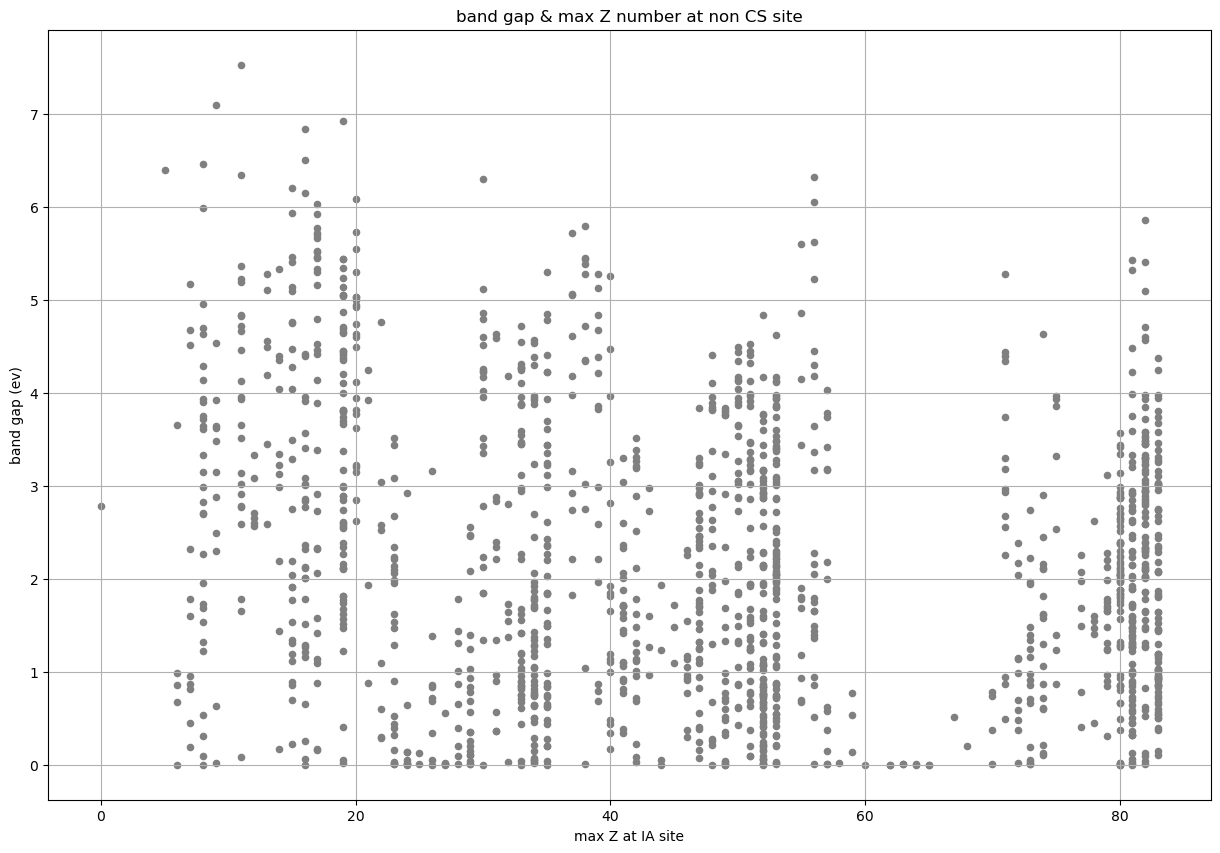

In [ ]:
pks_good = plot_score_2D(scores_dataframe_corrected,
                         labelx="max Z at IA site", 
                         labely="band gap (ev)", 
                         title='band gap & max Z number at non CS site')

In [ ]:
%pdb on

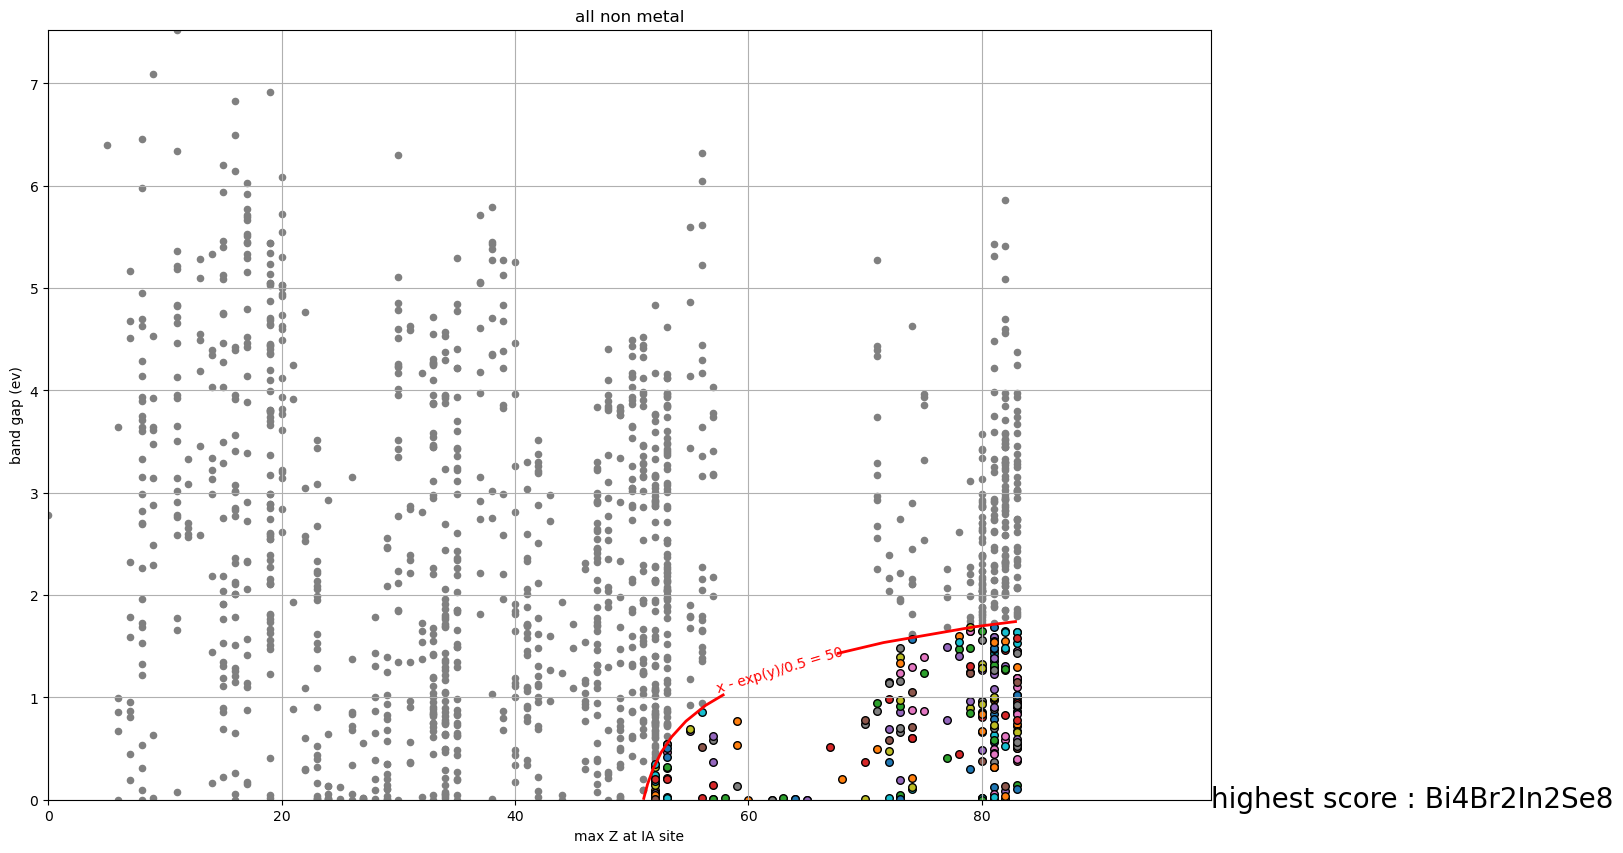

In [381]:
criterion_func_exp = lambda x, y: plot_criterion_3(x, y, 0.5)
pks_good_Z__band_gap = plot_score_2D(scores_dataframe_corrected,
                        labelx="max Z at IA site", 
                        labely="band gap (ev)", 
                        title='all non metal', 
                        print_chemical_symbol=False, 
                        print_criterion=criterion_func_exp, 
                        critical_constant=50)

In [157]:
len(pks_good_Z__band_gap) 

246

In [161]:
pks_formula = {}
for pk in pks_good_Z__band_gap:
    node = load_node(pk)
    chemical_formula = node.get_ase().get_chemical_formula()
    pks_formula[pk] = chemical_formula

In [ ]:
pks_formula

In [ ]:
scores_dataframe_corrected

In [139]:
scores_dataframe_inverse_Z_number = deepcopy(scores_dataframe_corrected)

In [140]:
scores_dataframe_inverse_Z_number['atom numbers'] = 1 / scores_dataframe_inverse_Z_number['atomes numbers']


In [141]:
scores_dataframe_inverse_Z_number = scores_dataframe_inverse_Z_number.rename(columns={"atom numbers": "inverse atom numbers"})

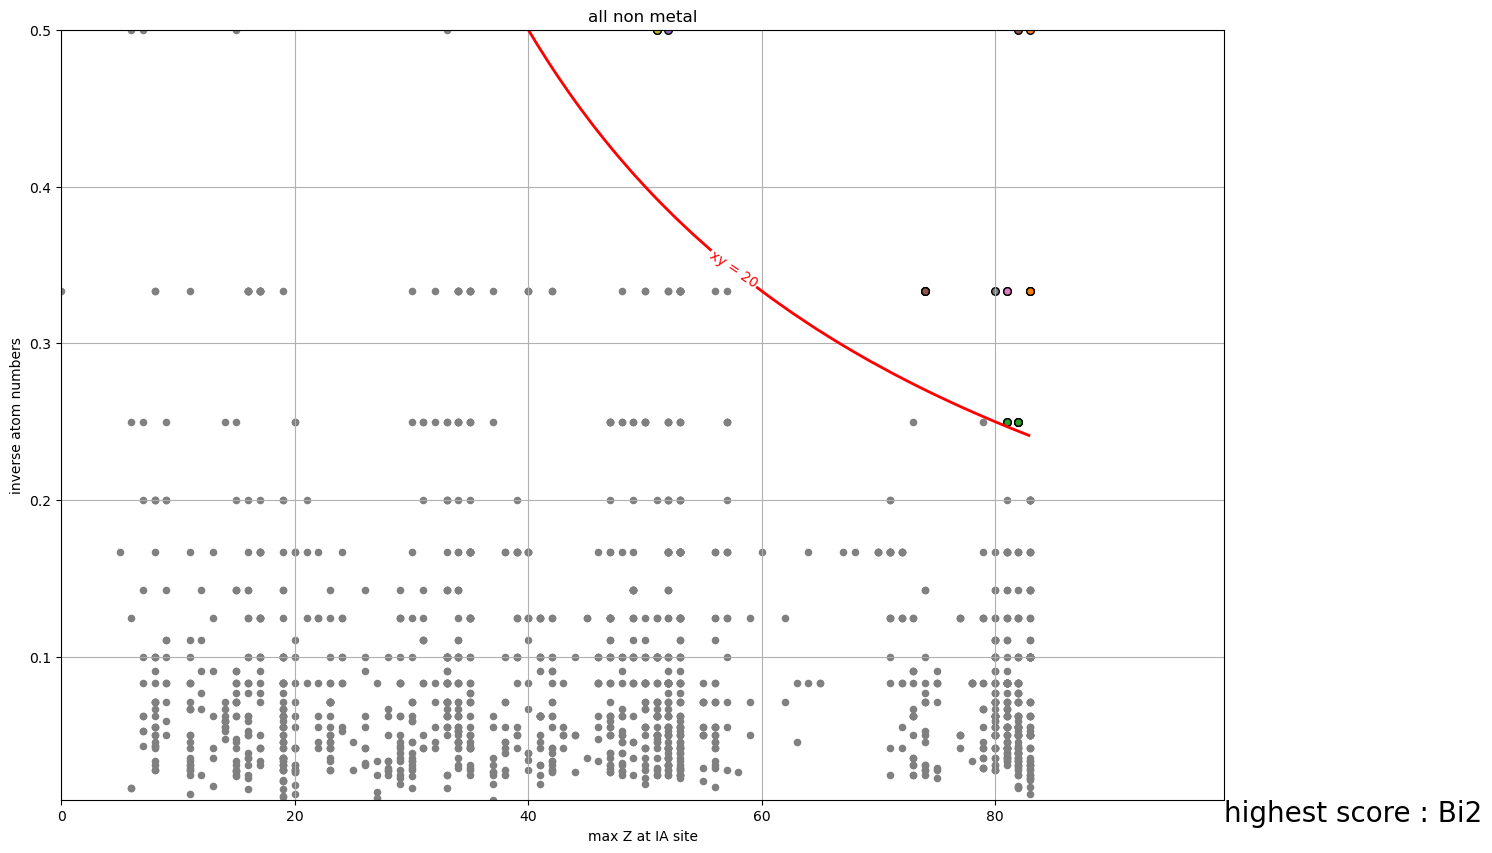

In [382]:
pks_good_Z_N_atoms = plot_score_2D(scores_dataframe_inverse_Z_number,
                        labelx="max Z at IA site", 
                        labely="inverse atom numbers", 
                        title='all non metal', 
                        print_chemical_symbol=False, 
                        print_criterion=plot_criterion_1, 
                        critical_constant=20)

# From different R(D)-1(2) subset of non_metals, plot the scores like above. 

### first, from the 1537 non metals, classifiy them to diff R(D)-1(2)

In [177]:
df_non_metam = pd.DataFrame.from_dict(list_non_metal)

In [239]:
type(list(list_non_metal.keys())[0])

str

In [183]:
pks_non_metal = list(list_non_metal.keys())

In [481]:
labels_type_SOC_colors

{'no R or D': 'orange',
 'R-2 and D-2': 'blue',
 'D-2': 'brown',
 'D-1 no any polar site': 'purple',
 'D-1 polar site exist': 'green',
 'R-1 and D-1': 'red',
 'unexpected case': 'grey',
 'error case': 'yellow'}

In [483]:
pks_R2_and_D2_no_metal = []
pks_pure_D2_no_metal = []
pks_pure_D1_nps_no_metal = []
pks_R1_D1_sg_polar_no_metal = []
pks_D1_P_site_no_metal = []
for pk in pks_non_metal:
    if isinstance(pk, str):
        pk = int(pk)
    node = load_node(pk)
    ase_struc = node.get_ase()
    asgds_objet = Atoms_symmetry_group_direct_space()
    asgds_objet.get_site_point_group(ase_struc)
    SOC_type = find_Rashba_Dresshauls_effet_of_1_crystal(asgds_objet)
    if SOC_type == 'R-2 and D-2':
        pks_R2_and_D2_no_metal.append(pk)
    elif SOC_type == 'D-2':
        pks_pure_D2_no_metal.append(pk)
    elif SOC_type == 'R-1 and D-1':
        pks_R1_D1_sg_polar_no_metal.append(pk)
    elif SOC_type ==  'D-1 no any polar site' :
        pks_pure_D1_nps_no_metal.append(pk)
    elif SOC_type == 'D-1 polar site exist':
        pks_D1_P_site_no_metal.append(pk)

In [549]:
for i, pk in enumerate(pks_non_metal):
    if isinstance(pk, str):
        pks_non_metal[i] = int(pk)

## in 1537 non metals , generated the dict than the dataframe of {pk : <class band_propretys>}

In [551]:
# df_band_propretys = {}
pks_magnetic_non_metal = []
for pk in pks_non_metal:
    if isinstance(pk,str):
        pk = int(pk)
    bp = band_propretys()
    bp.from_pk_struc2D(pk)
    is_magnetic = bp.is_magnetic
    if is_magnetic:
        pks_magnetic_non_metal.append(pk)
    # df_band_propretys[pk] = bp.to_dict()


In [552]:
len(pks_magnetic_non_metal)

28

In [581]:
from collections import Counter
c = Counter(pks_magnetic_non_metal)
for key in c :
    if c[key] != 1:
        print(key)

In [579]:
set_pks_non_metal = set(pks_non_metal)
for pk in pks_magnetic_non_metal:
    
    if pk not in set_pks_non_metal:
        print(pk)

In [600]:
len(set_pks_non_metal)

1537

In [ ]:
def remove_pks_magnetic(pks: list[int] , magnetic: list[int] = pks_magnetic_non_metal) :
    pks_return = deepcopy(pks)
    # print(len(pks_return))
    # set_pks_mag_non_metal = set(magnetic)
    # N_remove = 0
    pk_removed = []
    for pk in pks:
        
        # if isinstance(pk, str):
        #     pks_return[i] = int(pk)
        #     pk = int(pk)
        # if pk == 475237:
        #     print(pk in magnetic)
        if pk in magnetic:
            pks_return.remove(pk)
            pk_removed.append(pk)
    return pks_return, pk_removed

In [624]:
pks_non_metal_non_mag, pks_mag_removed = remove_pks_magnetic(pks=pks_non_metal)

True


In [697]:
def from_pks_get_chemical_formula(pk):
    node = load_node(pk)
    try :
        ase_objet = node.get_ase()
        chemical_formula = ase_objet.get_chemical_formula()
        return chemical_formula
    except :
        print(f"{pk} is not a valid pk for a ase object")

In [698]:
def save_pks_formula(list_pks : list[int], path : str):
    pks = {}
    for pk in list_pks:
        chem = from_pks_get_chemical_formula(pk)
        pks[pk] = chem
    
    df = pd.DataFrame(list(pks.values()), columns=['Chemical Formula'], index=list(pks.keys()))
    df.to_csv(path, index=True, header=True)

In [648]:
len(pks_non_metal_non_mag)

1509

In [626]:
len(pks_non_metal) - len(pks_non_metal_non_mag)  

28

In [ ]:
for i in range(len(pks_non_metal_non_mag)):
    pks_non_metal_non_mag[i] = int(pks_non_metal_non_mag)

In [627]:
pks_R2_and_D2_no_metal_non_mag, pks_removed_R2_D2 = remove_pks_magnetic(pks_R2_and_D2_no_metal)

True


In [628]:
pks_R1_D1_sg_polar_no_metal_non_mag, pks_removed_R1_D1 = remove_pks_magnetic(pks_R1_D1_sg_polar_no_metal)

In [629]:
pks_D1_P_site_no_metal_non_mag, pks_removed_D1_P_site = remove_pks_magnetic(pks_D1_P_site_no_metal)

In [630]:
len(pks_R2_and_D2_no_metal) - len(pks_R2_and_D2_no_metal_non_mag)

23

In [631]:
len(pks_D1_P_site_no_metal_non_mag) - len(pks_D1_P_site_no_metal)

-1

In [632]:
len(pks_R1_D1_sg_polar_no_metal) - len(pks_R1_D1_sg_polar_no_metal_non_mag)

4

### Just get dict of {pk , formula} in different type of pk

In [699]:
### case R-2 & D-2 non metal non magnet
path_csv_R2_nn = "/home/jyin/workspace/gene_data/pks_struc_2D_diff_cate/pks_chem_R2_and_D2_non_metal.csv"
save_pks_formula(pks_R2_and_D2_no_metal_non_mag, path=path_csv_R2_nn)

In [700]:
### case R-1 & D-1 non metal non magnet
path_csv_R1_nn = "/home/jyin/workspace/gene_data/pks_struc_2D_diff_cate/pks_chem_R1_and_D1_non_metal.csv"
save_pks_formula(pks_R1_D1_sg_polar_no_metal_non_mag, path=path_csv_R1_nn)

In [701]:
### case D-1 with polar site non metal non magnet
path_csv_D1_P_nn = "/home/jyin/workspace/gene_data/pks_struc_2D_diff_cate/pks_chem_D1_polar_site_non_metal.csv"
save_pks_formula(pks_D1_P_site_no_metal_non_mag, path=path_csv_D1_P_nn)

In [729]:
#### save all pk in group structure_2D with their formula
path_csv_all = "/home/jyin/workspace/gene_data/pks_struc_2D_diff_cate/pks_chem_all.csv"
save_pks_formula(pks_group_struc2D, path=path_csv_all)

##### Plot the circular diagram in non metal, the number of (magnetic, R1 & D1 non magnetic, R2 & D2 non magnetic)

In [661]:
plot_data = [ len(pks_R1_D1_sg_polar_no_metal_non_mag), len(pks_R2_and_D2_no_metal_non_mag), len(pks_D1_P_site_no_metal_non_mag)]
labels_data = {"R-1&D-1 space group polar non magnet" : 'red', "R-2&D-2 non magnet" : 'blue', "D-1 polar site exist" : 'green'}

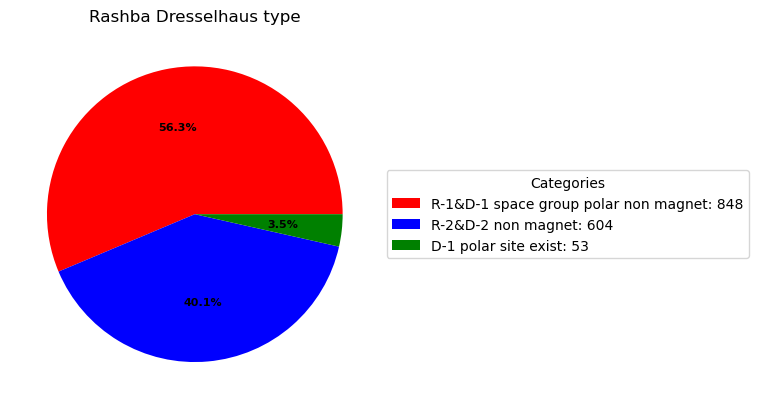

In [662]:
plot_circular(plot_data, labels_data, "Rashba Dresselhaus type")

0, case all non metal non magnetic

In [636]:
scores, labels = analyse_loop_pks_struc_2D(list_pks_non_metal=pks_non_metal_non_mag)

In [639]:
df_non_mag_non_metal = scores_to_dataframe(scores, labels)

In [443]:
path_json

'/home/jyin/workspace/gene_data/direct_space_data.json'

In [449]:
labels_type_SOC_colors

{'no R or D': 'blue',
 'R-2 and D-2': 'orange',
 'D-2': 'green',
 'D-1 no any polar site': 'red',
 'D-1 polar site exist': 'brown',
 'R-1 and D-1': 'purple',
 'unexpected case': 'grey',
 'error case': 'yellow'}

In [511]:
labels_type_SOC_colors.pop('error case')

'yellow'

In [650]:
labels_type_SOC_colors.pop('unexpected case')

'grey'

In [653]:
labels_type_SOC_colors

{'no R or D': 'orange',
 'R-2 and D-2': 'blue',
 'D-2': 'brown',
 'D-1 no any polar site': 'purple',
 'D-1 polar site exist': 'green',
 'R-1 and D-1': 'red'}

In [658]:
labels_type_SOC_colors = {
                          'R-1 and D-1': 'red',
                          
                            'D-1 polar site exist': 'green',
                            'R-2 and D-2': 'blue',
                            'D-1 no any polar site': 'purple',
                            'D-2': 'brown',
                            'no R or D': 'orange'
                            
                            }

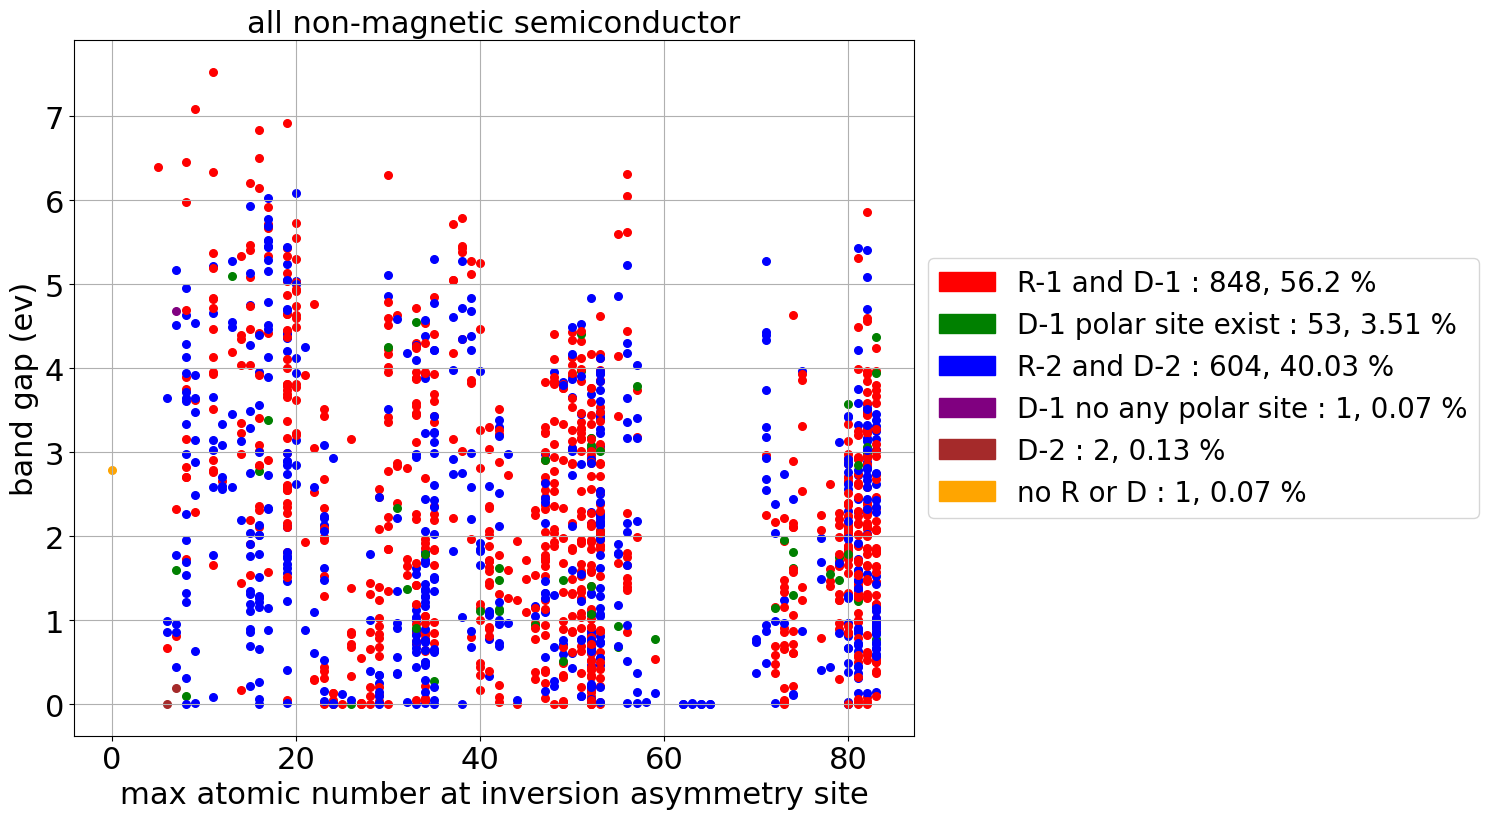

In [ ]:
criterion_func_exp = lambda x, y: plot_criterion_3(x, y, 0.5)
pks_good_Z_band_gap_non_magnet = plot_score_2D(df_non_mag_non_metal,
                        labelx="max Z at IA site", 
                        labelx_to_print= "max atomic number at inversion asymmetry site", 
                        labely="band gap (ev)", 
                        autocolor_selection=False,
                        print_type_SOC_color=True,
                        type_SOC_file=path_json,
                        labels_type_SOC_colors=labels_type_SOC_colors,
                        title='1509 non-magnetic semiconductor', 
                        print_chemical_symbol=False, 
                        # print_criterion=criterion_func_exp, 
                        critical_constant=50)

In [ ]:
pks_good_Z_band_gap_non_magnet

In [396]:
pks_chemical_symbol_good_Z_band_gap_non_magnet = {}
for pk in pks_good_Z_band_gap_non_magnet:
    node = load_node(pk)
    chemical_formula = node.get_ase().get_chemical_formula()
    pks_chemical_symbol_good_Z_band_gap_non_magnet[pk] = chemical_formula

In [ ]:
pks_chemical_symbol_good_Z_band_gap_non_magnet

In [393]:
len(pks_good_Z_band_gap_non_magnet)

238

1, case R2&D2 and non metal and non magnetic 

In [637]:
scores_R2_D2, labels_R2_D2 = analyse_loop_pks_struc_2D(list_pks_non_metal=pks_R2_and_D2_no_metal_non_mag)

In [270]:
df_score_R2_D2 = scores_to_dataframe(scores_R2_D2, labels_R2_D2)

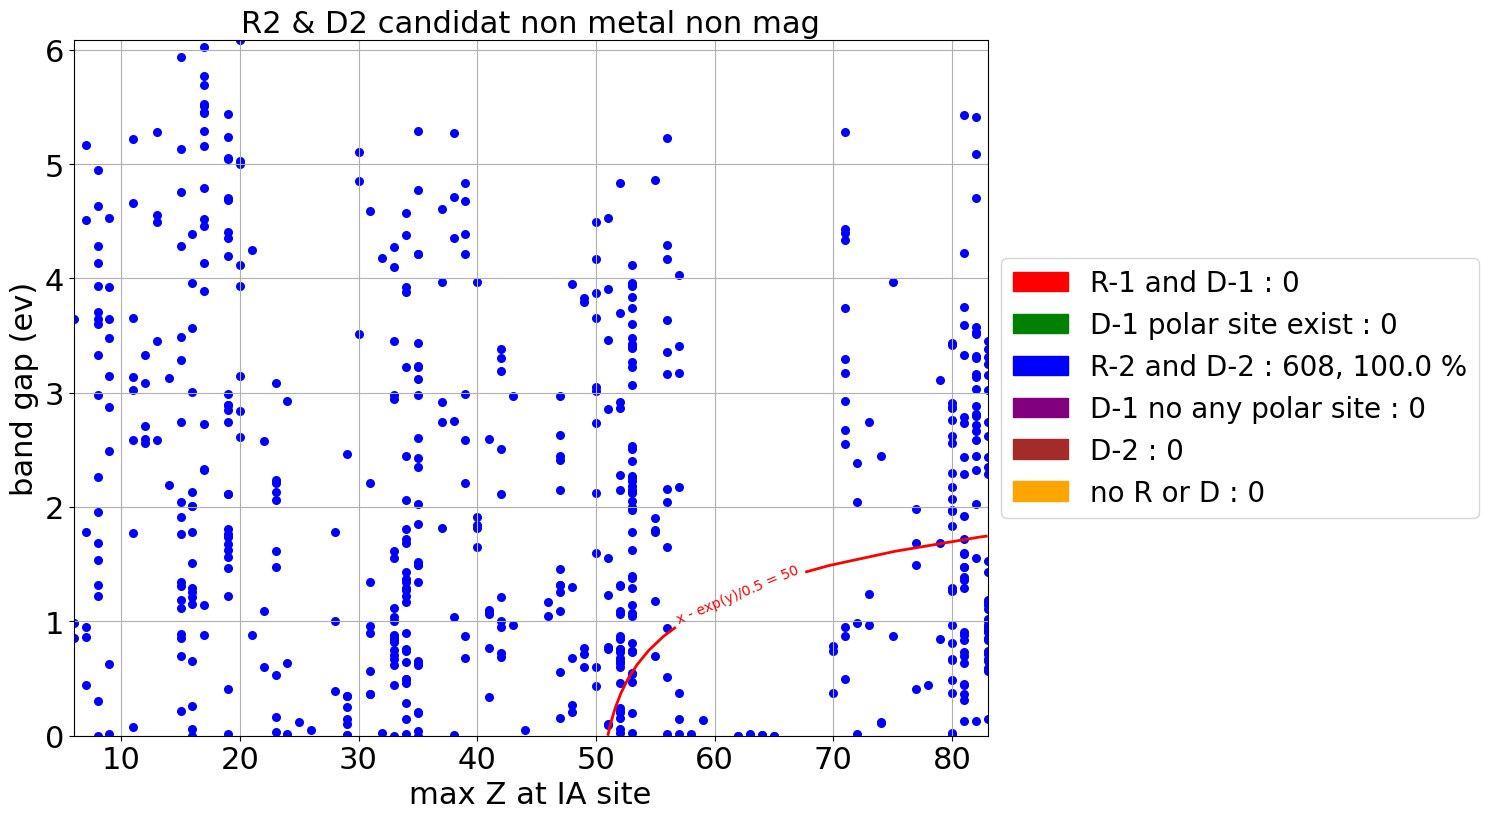

In [681]:
criterion_func_exp = lambda x, y: plot_criterion_3(x, y, 0.5)
pks_good_Z_band_gap_R2_D2 = plot_score_2D(df_score_R2_D2,
                        labelx="max Z at IA site", 
                        labely="band gap (ev)", 
                        autocolor_selection=False,
                        print_type_SOC_color=True,
                        print_contour_criterion=True,
                        type_SOC_file=path_json,
                        labels_type_SOC_colors=labels_type_SOC_colors,
                        title='R2 & D2 candidat non metal non mag', 
                        print_chemical_symbol=False, 
                        print_criterion=criterion_func_exp, 
                        critical_constant=50)

In [438]:
pks_chemical_symbol_good_Z_band_gap_non_magnet_R2_D2 = {}
for pk in pks_good_Z_band_gap_R2_D2:
    node = load_node(pk)
    chemical_formula = node.get_ase().get_chemical_formula()
    pks_chemical_symbol_good_Z_band_gap_non_magnet_R2_D2[pk] = chemical_formula

In [439]:
pks_chemical_symbol_good_Z_band_gap_non_magnet_R2_D2

{188006: 'Pt4Te6Tl2',
 190613: 'Br4Cu4Hg4Se4',
 190944: 'Pd4Sn4Te4',
 192787: 'Bi2S3',
 192876: 'Cl4Cu4Hg4S4',
 200391: 'Cl4Cu4Hg4S4',
 202216: 'Hg2Pt4Se6',
 206012: 'PdTe2',
 212091: 'As2S6SnTl2',
 212476: 'Bi2Pb2Se5',
 215578: 'Pt4Se6Tl2',
 217185: 'As4Br4Cd4Hg4',
 216964: 'Pt4S6Tl2',
 216968: 'B2Cs2I24Zr12',
 217015: 'Sm2Te6',
 218640: 'Bi2SnTe4',
 221551: 'Bi2GeTe4',
 221963: 'Ag2Bi2Cl4S2',
 224122: 'Re4Te8',
 224192: 'Ag4Hg4I4S4',
 225344: 'Br28Ta12',
 225041: 'Bi14S8Te13',
 224800: 'Br4Cu4Hg4S4',
 229968: 'Bi2Cl4Cu2S2',
 230619: 'Cu2Hf2Se6Tl2',
 232625: 'Cu2Hf2S6Tl2',
 235235: 'Cu2Se6Tl2Zr2',
 236418: 'Cr2Si2Te6',
 237318: 'Pd4Se6Tl2',
 237307: 'Ag4Br4Hg4S4',
 244454: 'Bi2F2S4Sr2',
 246725: 'I28Ta12',
 254445: 'H16Ce2O14P6',
 289621: 'F16Hf4N4',
 289370: 'Au2Bi2Pb4S6Te4',
 290548: 'Cl4Re6Se8Tl2',
 291262: 'Cl8Hg3MgO6',
 293179: 'Cu2S8Tl2Zr3',
 293221: 'Eu2O14P6',
 294432: 'Ba2F10Ga2O4',
 295063: 'Cu2Se8Tl2Zr3',
 298286: 'Cl10Fe2W2',
 306170: 'Br10Ir2K2N2O4',
 316568: 'N2Pb2S4',
 

In [679]:
node_R2_D2_test = load_node(504999)
uuid_R2_D2_test = node_R2_D2_test.uuid

In [680]:
uuid_R2_D2_test

'7f77f007-7f69-48f0-a743-cfa7a096b713'

2, case R1 and D1 where space group polar and  non metal, non magnet

In [638]:
scores_R1_D1_sg_polar, labels_R2_D2_sg_polar = analyse_loop_pks_struc_2D(list_pks_non_metal=pks_R1_D1_sg_polar_no_metal_non_mag)

In [278]:
df_score_R1_D1_sg_polar = scores_to_dataframe(scores_R1_D1_sg_polar, labels_R2_D2_sg_polar)

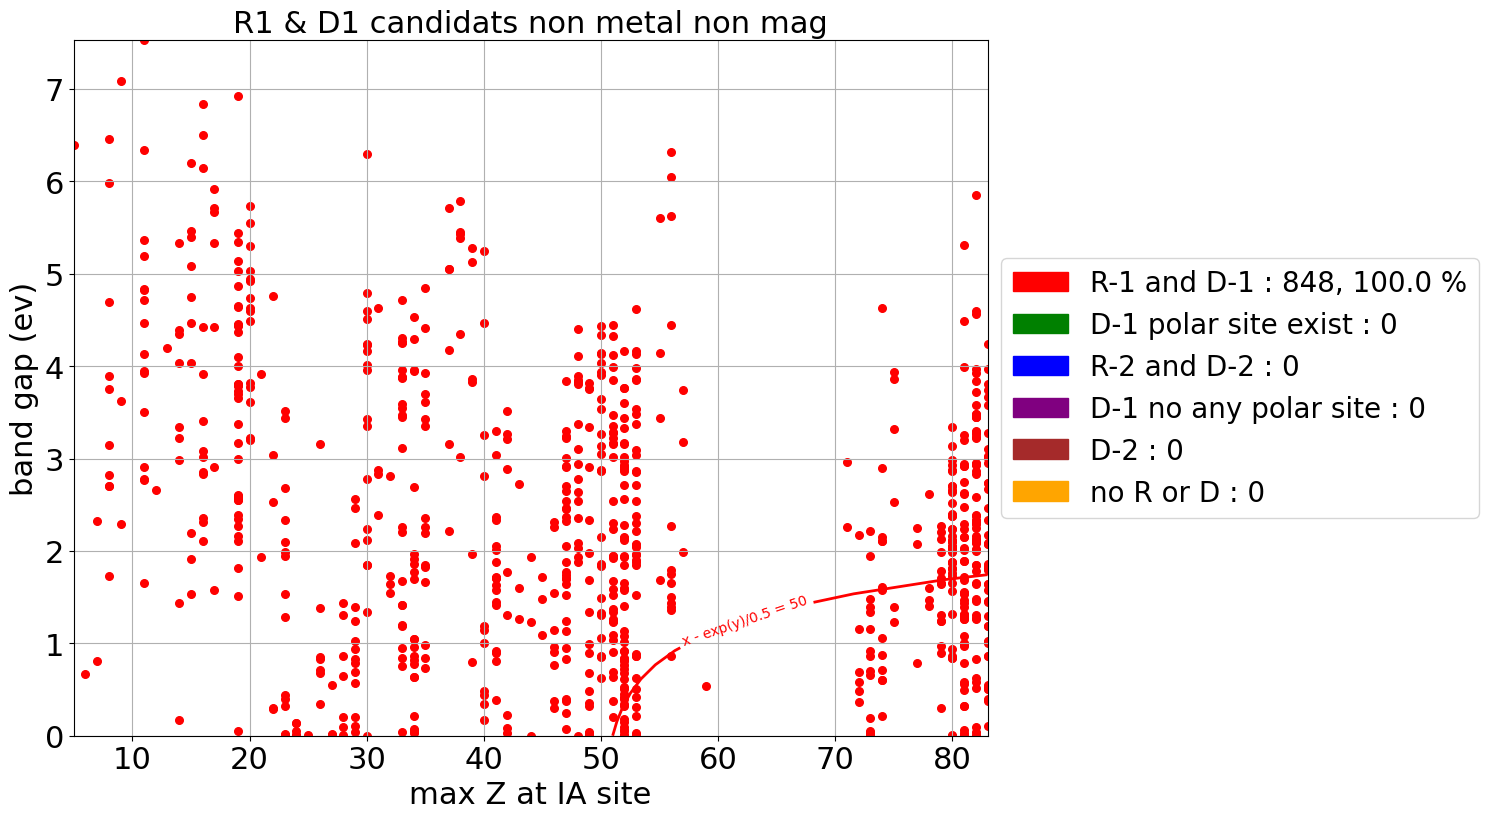

In [685]:
criterion_func_exp = lambda x, y: plot_criterion_3(x, y, 0.5)
pks_good_Z_band_gap_R1_D1 = plot_score_2D(df_score_R1_D1_sg_polar,
                        labelx="max Z at IA site", 
                        labely="band gap (ev)", 
                        title='R1 & D1 candidats non metal non mag', 
                        autocolor_selection=False,
                        print_type_SOC_color=True,
                        type_SOC_file=path_json,
                        # print_highest_score=True,
                        labels_type_SOC_colors=labels_type_SOC_colors,
                        print_chemical_symbol=False, 
                        print_criterion=criterion_func_exp, 
                        critical_constant=50)

### exemple R-2 & D-2 LuIO 

In [ ]:
uuid_LuIO = '0a8f8fd6-b4f5-4a52-8b26-681c3afb1cf9'
node_LuIO = load_node(uuid_LuIO)


In [687]:
node_LuIO.pk

477563

In [692]:
ase_LuIO = node_LuIO.get_ase()

In [693]:
asgds_LuIO = Atoms_symmetry_group_direct_space()
asgds_LuIO.get_site_point_group(ase_LuIO)

In [695]:
dict_LuIO = asgds_LuIO.to_dict()

In [696]:
dict_LuIO["list site point group"]

[{'Z number': 71,
  'scaled position': [0.5, 0.0, 0.5414100545366929],
  'wyckoff letter': 'c',
  'site symmetry ITA notation': '4mm',
  'site point group HM notation': '4mm',
  'site point group Sch notation': 'C4v',
  'order of principal axis': 4,
  'principal axis': [0.0, 0.0, 1.0],
  'type principal axis': 'rotation',
  'polar': True,
  'centrosymmetric': False,
  'chiral': False},
 {'Z number': 71,
  'scaled position': [0.0, 0.5, 0.4585899454556111],
  'wyckoff letter': 'c',
  'site symmetry ITA notation': '4mm',
  'site point group HM notation': '4mm',
  'site point group Sch notation': 'C4v',
  'order of principal axis': 4,
  'principal axis': [0.0, 0.0, 1.0],
  'type principal axis': 'rotation',
  'polar': True,
  'centrosymmetric': False,
  'chiral': False},
 {'Z number': 53,
  'scaled position': [0.0, 0.5, 0.6152767550368385],
  'wyckoff letter': 'c',
  'site symmetry ITA notation': '4mm',
  'site point group HM notation': '4mm',
  'site point group Sch notation': 'C4v',
  'o

## For all R-2 & D-2 type: find the sectors.


First all sectors contains dipole perpenticular to plan : use function get_dipole_sum_for_Cn_bigger_2()

In [732]:
struc_sectors = {}
for pk in pks_R2_and_D2_no_metal_non_mag :
    node_R2 = load_node(pk)
    ase_objet = node_R2.get_ase()
    asgds_objet = Atoms_symmetry_group_direct_space()
    
    asgds_objet.get_site_point_group(atoms=ase_objet)
    cell = asgds_objet._cell_basis_vectors
    C_vector = cell[-1,-1]
    Z_wp_dipol, Z_wp_dipole_null, Z_wp_sectors = get_dipole_sum_for_Cn_bigger_2(asgds_objet)
    Z_sectors_distance = {}
    for key in Z_wp_sectors:
        Z_number = key.split(' ')[0]
        Z_number = int(Z_number)
        pairs = Z_wp_sectors[key]
        
        pairs_m = pairs['m']
        pairs_m_glide = pairs['m glide']
        pairs_all = pairs_m + pairs_m_glide
        if len(pairs_all) > 0:
            distances_max = -1
            for pair in pairs_all:
                distance = abs(pair[0] - pair[1])
                if distance > distances_max:
                    distances_max = distance
            
            Z_sectors_distance[Z_number] = distances_max * C_vector ### distance in the C vector direction, Anstrom
    
    struc_sectors[pk] = Z_sectors_distance


In [ ]:
#### all structure pk with their sector contains polar site point group Cn or Cnv (n >= 2) and axi Cn perpendicular to plan 
struc_sectors

In [791]:
pk_have_sector_n_bigger_2 = {}
for pk in struc_sectors : 
    if struc_sectors[pk] != {}:
        node = load_node(pk)
        uuid = node.uuid
        pk_have_sector_n_bigger_2[pk] = uuid


In [792]:
pk_have_sector_n_bigger_2

{188363: '8c79bd6b-6d23-4df8-912d-d4870fe3db81',
 189150: '5e71ea9a-c008-486d-92f9-7fd752093920',
 197967: '2a7f5d39-4dc2-4ac2-9a67-fa2d4547ec52',
 208961: '2ce37445-5663-44cf-9e46-77e389105eca',
 210895: '1a2bfcc4-24bb-40bf-922f-b171d3eb295e',
 211609: 'd515a0f3-c743-4d7f-a836-ea4314b8f83d',
 212314: '852fd9e1-fcf5-483b-8c06-91279861adac',
 213673: 'e078b30e-bfbd-41ad-b74f-c82efaf2fc64',
 221208: '74a02be2-f410-4417-8d69-1c0a200f6bf1',
 221907: '1dcf4474-cdf3-4e68-a815-5b73566c2922',
 227375: '9664a311-fed6-4114-9313-8c24fed59b39',
 227227: '71c6ed8d-577a-45bc-be5f-acced14f1ec1',
 232932: '2b0d78fe-20d2-4b99-b737-2122034b8b61',
 244454: 'b26251d5-9568-4c2b-8e56-a4c04f5b3ede',
 245263: '80cbed34-a84b-4fcf-9420-88f6f996dd0a',
 247407: 'b365485d-06cf-49e7-8a98-3e9cb137805b',
 473061: '872bd5f2-ad5e-4b06-ad26-a9809e7eb840',
 477563: '0a8f8fd6-b4f5-4a52-8b26-681c3afb1cf9',
 482107: '9513c367-ac23-4063-b7ec-96bf7b722f7f',
 486053: '8ce6279e-5b75-4aae-b28b-51c5884c4c0d',
 485675: '2612b1b8-6

In [744]:
node_RD2_random = load_node(188363)
chem = node_RD2_random.get_ase().get_chemical_formula()

188363 : https://mc2d.materialscloud.org/#/details/mc2d-1062

In [737]:
v = 0
for pk in struc_sectors:
    value = struc_sectors[pk]
    if value == {}:
        v += 1
v

569

In [736]:
len(struc_sectors)

604

#### just 35 materiaux have pair of sectors perpendicular to Z (Cn, Cnv where principal axis perpendicular to plan)

##### just try to find how many materials have atoms site C1 or Cs

In [758]:
have_C1_site = []
have_Cs_site = []
have_C1_or_Cs_site = []
for pk in pks_R2_and_D2_no_metal_non_mag:
    node_R2 = load_node(pk)
    ase_objet = node_R2.get_ase()
    asgds_objet = Atoms_symmetry_group_direct_space()
    
    asgds_objet.get_site_point_group(atoms=ase_objet)
    sites_info = asgds_objet._sites_point_group
    for site in sites_info:
        if site._site_point_group_Sch == 'C1':
            have_C1_site.append(asgds_objet)
            have_C1_or_Cs_site.append(asgds_objet)
        if site._site_point_group_Sch == 'Cs':
            have_Cs_site.append(asgds_objet)
            have_C1_or_Cs_site.append(asgds_objet)

In [759]:
len(set(have_C1_site))

316

In [760]:
len(set(have_Cs_site))

203

In [761]:
len(set(have_C1_or_Cs_site))

441

In [757]:
len(pks_R2_and_D2_no_metal_non_mag)

604

In [779]:
eg = have_C1_or_Cs_site[400]

In [780]:
eg_dict = eg.to_dict()
eg_dict

{'Type': 'dict from class Atoms_symmetry_group_direct_space',
 'formula': 'Hg4Mo2O8',
 'cell basis vectors': [[5.03832091522791, -0.197356215115535, 0.0],
  [0.995210885338857, 7.91940050041552, 0.0],
  [0.0, 0.0, 24.5994104049994]],
 'space group notation HM': 'P2/c',
 'point group notation HM': '2/m',
 'point group notation Sch': 'C2h',
 'polar axis': [],
 'list site point group': [{'Z number': 80,
   'scaled position': [0.20979909446145423,
    0.3417585527792049,
    0.44106165253679647],
   'wyckoff letter': 'g',
   'site symmetry ITA notation': '1',
   'site point group HM notation': '1',
   'site point group Sch notation': 'C1',
   'order of principal axis': 1,
   'principal axis': [],
   'type principal axis': 'identity',
   'polar': 1.0,
   'centrosymmetric': 0.0,
   'chiral': 1.0},
  {'Z number': 80,
   'scaled position': [0.290200905572023,
    0.6582414472457635,
    0.44106165253679647],
   'wyckoff letter': 'g',
   'site symmetry ITA notation': '1',
   'site point group H

In [784]:
P2_c = Group(13)
scaled_pos_Mo1 = np.array([0.24999999998996142,
    7.23674804748884e-17,
    0.5492923289645701])



In [741]:
path_json_sector_R2 = '/home/jyin/workspace/gene_data/pks_struc_2D_diff_cate/pks_sector_Z_max_distance_n_bigger_2'
with open(path_json_sector_R2, "w") as f:
    json.dump(struc_sectors, f, indent=4)

all space group info

In [688]:
all_space_group_info = list_all_space_group()

In [789]:
Z_wp_sectors

{}

### Find symmetries in reciprocal space

NameError: name 'pks_R1_D1_sg_polar_no_metal_non_mag' is not defined